In [164]:
#Libraries and dependecies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn import metrics



In [209]:
#Loading Data
df = pd.read_csv("winequality-red.csv", sep=';')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


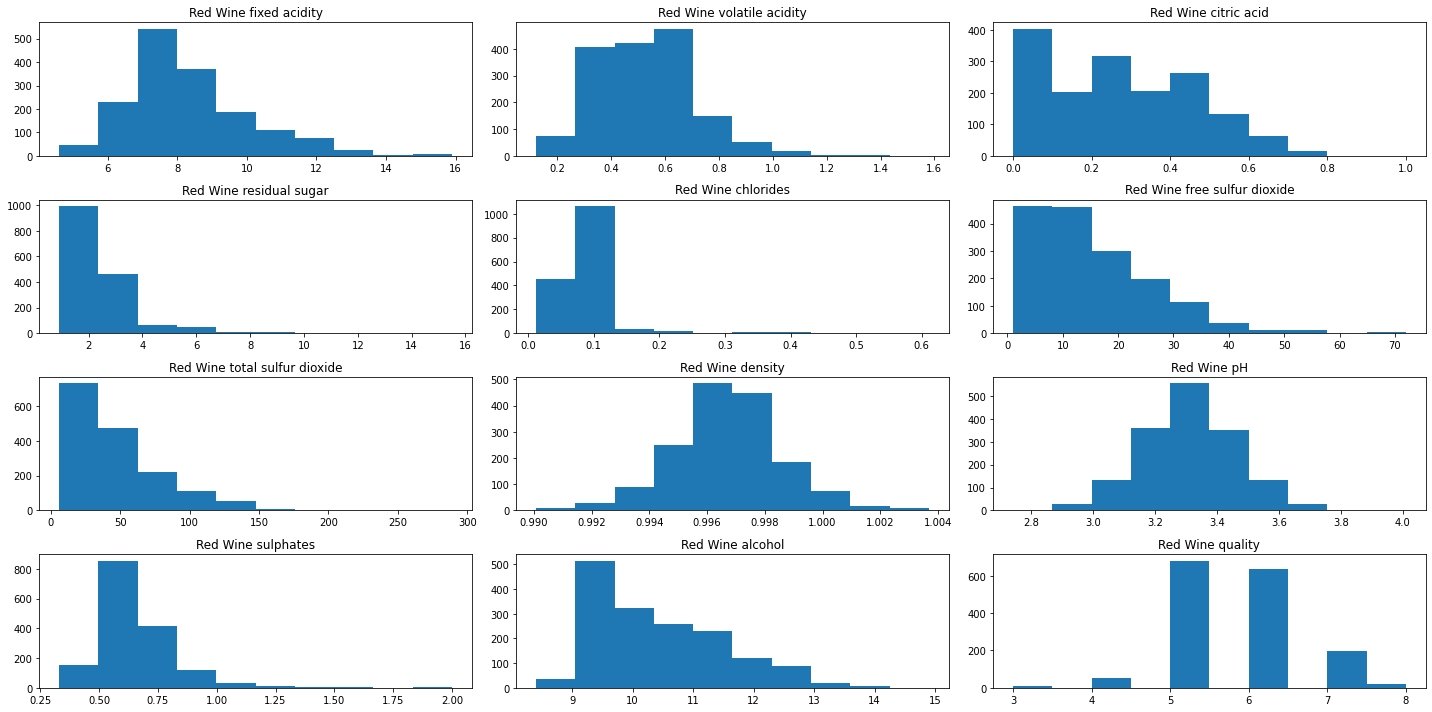

In [107]:
#Exploring Data
#Red Wine Normaility Distribution
fig = plt.figure(figsize = [20,10])
cols = df.columns
count = 1
for col in cols:
    plt.subplot(4,3,count)
    count+=1
    plt.hist(df[col])
    plt.title("Red Wine " + col)
plt.tight_layout()
plt.show()

In [109]:
#getting inputs and target
X = df.values[:, 0:11]
Y = df.values[:, 11]
m = len(Y)

### Data Preprocessing

In [199]:
#Train, Test, Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42,shuffle=True) 

#Z scaling
#create a scaler object
std_scaler = StandardScaler()
# fit and transform the data
X_train = pd.DataFrame(std_scaler.fit_transform(X_train))
X_test = pd.DataFrame(std_scaler.fit_transform(X_test))
X_val = pd.DataFrame(std_scaler.fit_transform(X_val))

In [200]:
error_baseline = sum(Y)/m

In [201]:
print(error_baseline)

5.6360225140712945


In [202]:
#sklearn Ridge 
clf = Ridge(alpha=1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(clf.score(X_test, Y_test, sample_weight=None))


0.41152001241361325


In [203]:
#sklearn Ridge with builtin cross validation
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, Y_train)
Y_pred = clf.predict(X)
print(clf.score(X_test, Y_test, sample_weight=None))


0.4115200124136088


In [208]:
#LASSO WITH CROSS VALIDATION
reg = LassoCV(cv=5, random_state=0).fit(X_train, Y_train)
print(reg.score(X_train, Y_train))
print(reg.coef_)


#LASSO
clf = Lasso(alpha=0.1)
clf.fit(X,Y)
print(clf.score(X, Y))


0.3607475889881415
[ 0.10608781 -0.20201092 -0.03227674  0.0399786  -0.06579446  0.01534998
 -0.08007192 -0.08272752 -0.00362176  0.13999846  0.27615452]
0.23937236014517016


### Feature Selection with LASSO
### These features contribute significantly: alcohol > volatile acidity> sulphates> fixed acidity> total sulfur dioxide> free sulfur dioxide: 10,1,9,0,6,5

In [248]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [212]:
#Elastic Net with CV
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X_train, Y_train)
print(regr.alpha_)
print(regr.score(X_test, Y_test))

#ElasticNet 
regr = ElasticNet(random_state=0)
regr.fit(X, Y)
print(regr.score(X, Y))

0.004798714281977396
0.41014098590517667
0.03418278041650524


### Better Model
#### Of the three, Ridge Regression with cross validation is the best
#### Focus of using Ridge Regression with CV during hyperparameter tuning

In [2]:
Xr_train = X_train[[10,1,9,0,6,5]]
Xr_test = X_test[[10,1,9,0,6,5]]
Xr_val = X_val[[10,1,9,0,6,5]]

r_alphas = np.logspace(-3, 2, 100)

clf = RidgeCV(alphas=r_alphas, scoring='r2').fit(X_train, Y_train)
print(clf.score(X_test, Y_test, sample_weight=None))
print(clf.alpha_)
print(r_alphas)

NameError: name 'X_train' is not defined

### Hyperparameter tuning:
#### alphas, features, regression type